<a href="https://colab.research.google.com/github/Urban186/Astron-1221/blob/main/Education_vs_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # we shorten numpy to np to make it faster to use
import matplotlib.pyplot as plt # we shorten this to plt to be able to type our code faster

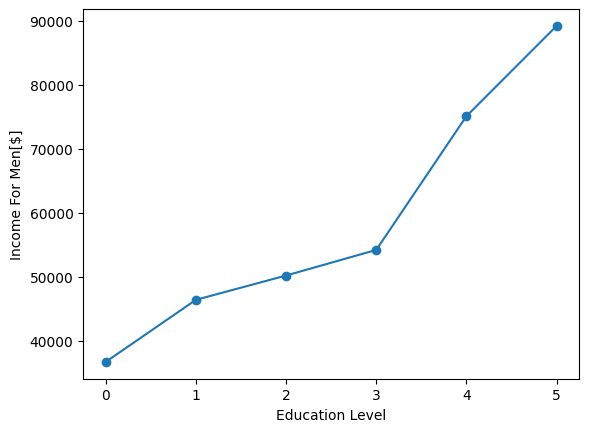

In [21]:
Income_arr = np.array([36700.,46400.,50200.,54200.,75100.,89200.]) # we set an array as the medium income for men versus their education level
Education_arr = np.arange(len(Income_arr)) # we arrange the range via education level
plt.plot(Education_arr,Income_arr, "o-") # we set up the graph
plt.xlabel("Education Level") # we set the x lable to education level
plt.ylabel("Income For Men[$]") # we set the y label to income
plt.show() # we print the graph

In [16]:
#we set the x-axis numbers to the education level to show the relationship between education level and income
Education_levels = np.array([
"Less than high school completion",
"High school completion",
"Some college, no degree",
"Associate’s degree",
"Bachelor’s degree",
"Master’s or higher degree"
])

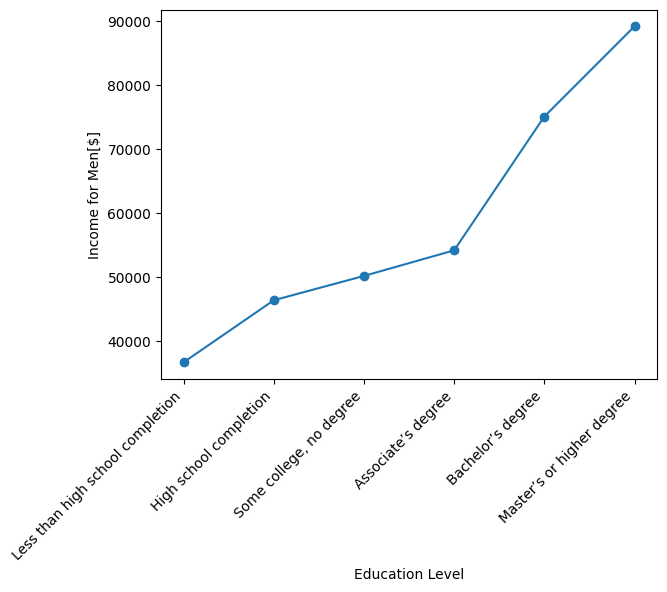

In [23]:
# below we recreate the graph with the new label's for the x-axis and to make it easier to see
plt.plot(Education_arr,Income_arr, "o-")
plt.xlabel("Education Level")
plt.ylabel("Income for Men[$]")
plt.xticks(Education_arr, Education_levels, rotation=45, ha="right")
plt.show()

In [19]:
# we use a first-order polynomial to fit the data with a linear relationship
z_linear = np.polyfit(Education_arr,Income_arr,1)
# "income = z_linear[0] * level + z_linear[1]", where z_linear[0] represents the slope and z_linear[1] represents the y-intercept
print("Slope = ", z_linear[0], " in dollar per level")
print("Y-intercept = ", z_linear[1], " in dollar at level 0, i.e., Less than high school completion")

Slope =  8634.28571428571  in dollar per level
Y-intercept =  31547.619047619028  in dollar at level 0, i.e., Less than high school completion


In [20]:
z_quadratic = np.polyfit(Education_arr,Income_arr,2)
print(z_quadratic)
print("That is: Income = {:.1f} * level**2 + {:.1f} * level + {:.1f}".format(z_quadratic[0], z_quadratic[1], z_quadratic[2]))
# Note the above line on the usage of {} for printing variables, and :.1f to control the printed number of siginifiant digits

[ 1630.35714286   482.5        36982.14285714]
That is: Income = 1630.4 * level**2 + 482.5 * level + 36982.1


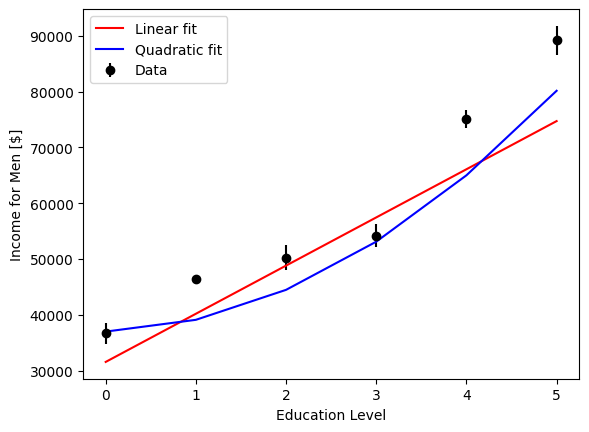

In [24]:
O = Income_arr
O_err = np.array([1910, 500, 2220, 2140, 1540, 2580]) # extract from the same figure with Confidence interval toggled on, and remove the first entry
C_linear = z_linear[0] * Education_arr + z_linear[1]
C_quadratic = z_quadratic[0] * Education_arr**2 + z_quadratic[1] * Education_arr + z_quadratic[2]

Income_arr = np.array([36700.,46400.,50200.,54200.,75100.,89200.]) # we set the graph to the same graph as below
Education_arr = np.arange(len(Income_arr))
plt.errorbar(Education_arr, O, yerr=O_err, marker="o", linestyle = "None", color = "black", label = "Data")
plt.plot(Education_arr,C_linear, color = "red", label = "Linear fit")
plt.plot(Education_arr,C_quadratic, color = "blue", label = "Quadratic fit")
plt.legend()
plt.xlabel("Education Level")
plt.ylabel("Income for Men [$]")
plt.show()

In [25]:
n = len(O)
m_linear = 2
m_quadratic = 3
re_chi2_linear = np.sum((O - C_linear)**2 / O_err**2) / (n - m_linear)
print("Reduced Chi2 for linear fit = {:.2f}".format(re_chi2_linear))
re_chi2_quadratic = np.sum((O - C_quadratic)**2 / O_err**2) / (n - m_quadratic)
print("Reduced Chi2 for quadratic fit = {:.2f}".format(re_chi2_quadratic))
# This section of the code shows us the fit bewteen the linear line and the quadratic line, and how the quadratic line is a better fit

Reduced Chi2 for linear fit = 57.60
Reduced Chi2 for quadratic fit = 91.91


In [26]:
print((O - C_linear)**2 / O_err**2) # we print the line of best fit for the linear line

[  7.27694676 154.65883356   0.38854979   2.30710007  34.26990973
  31.50321223]


In [27]:
print((O - C_quadratic)**2 / O_err**2)
np.set_printoptions(suppress=True)
print((O - C_quadratic)**2 / O_err**2) # we print the line of best fit for the quadratic line

[  0.02182084 213.4521       6.66530182   0.26284445  43.0314093
  12.29461419]
[  0.02182084 213.4521       6.66530182   0.26284445  43.0314093
  12.29461419]
